In [1]:
# Import package
import json
import tweepy
import myCredentials as my
from tweepy import StreamListener
from tweepy import Stream
from tweepy import Cursor

In [2]:
# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(my.consumer_key, my.consumer_secret)
auth.set_access_token(my.access_token, my.access_token_secret)

#api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
##public_tweets = api.home_timeline()
query = "corona"+" -filter:retweets"
search = Cursor(api.search, q = query, lang = 'en'). items(100)

In [4]:
x = search.next()
print(x.text, x.entities)
#You can find the url in the tweets in the entities.url
dir(x)

So are y’all going to punish the rich people that pull shit like $KODK back in August? You can’t tell me suits didn… https://t.co/G52W3taPmk {'hashtags': [], 'symbols': [{'text': 'KODK', 'indices': [65, 70]}], 'user_mentions': [], 'urls': [{'url': 'https://t.co/G52W3taPmk', 'expanded_url': 'https://twitter.com/i/web/status/1355456263879094273', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'metadata',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']

In [5]:
import pandas as pd
from pandas import DataFrame
list_of_dicts = []
user_mention = []
for tweet in search:
    is_sensitive = tweet.possibly_sensitive if hasattr(tweet, 'possibly_sensitive') else ""
    url = "" if DataFrame.from_dict(tweet.entities['urls']).empty else DataFrame.from_dict(tweet.entities['urls']).url[0]
    list_of_dicts.append({'tweet_id':tweet.id, 'tweet' :tweet.text, 'created_at':tweet.created_at,
                         'url' : url, 'friends_count': tweet.user.friends_count, 
                         'followers_count':tweet.user.followers_count, "is_sensitive": is_sensitive})
    for mention in tweet.entities['user_mentions']:
        user_mention.append({'tweet_id': tweet.id,'mentioned_user_name':mention['screen_name'],
                             'mentioned_name':mention['name']})

list_of_dicts

[{'tweet_id': 1355456229947170817,
  'tweet': '@WinterfellT It’s almost as spectacular as the mess that the EU have made of the pandemic.\n\nThings they have to dea… https://t.co/do8oIHQftg',
  'created_at': datetime.datetime(2021, 1, 30, 10, 2, 3),
  'url': 'https://t.co/do8oIHQftg',
  'friends_count': 1140,
  'followers_count': 462,
  'is_sensitive': ''},
 {'tweet_id': 1355456176880832512,
  'tweet': '@MakemeSleepPls Kya? Phone naya liya tha, setup kiya..Face ID lagana pada nahi toh har baar password mangta tha for… https://t.co/mPixrosfuD',
  'created_at': datetime.datetime(2021, 1, 30, 10, 1, 50),
  'url': 'https://t.co/mPixrosfuD',
  'friends_count': 77,
  'followers_count': 74,
  'is_sensitive': ''},
 {'tweet_id': 1355456145347981314,
  'tweet': 'The PhD show the how we have created epidemics of elderly  people with psychiatric disorders who now, in the… https://t.co/bTU2uTV16Y',
  'created_at': datetime.datetime(2021, 1, 30, 10, 1, 42),
  'url': 'https://t.co/bTU2uTV16Y',
  'fri

In [6]:
df= DataFrame.from_dict(list_of_dicts)
p = DataFrame.from_dict(user_mention)
p

,tweet_id,mentioned_user_name,mentioned_name
0,1355456229947170817,WinterfellT,Mark Lees
1,1355456176880832512,MakemeSleepPls,Ragika🎶🦋
2,1355456133406875649,dasmaddin,DasMaddin
3,1355456133406875649,gottbertulus,Gottbertulus
4,1355456133406875649,Calldere,Fleur
...,...,...,...
74,1355452896792498178,TheAstroPub,Paul Shelley | #BLM
75,1355452878643585024,undipmenfess,Use -dips! || BACA RULES!
76,1355452822666416131,farrukh122345,One Man Army 👊
77,1355452728516993025,earthling_that,♡MOA♡


In [7]:
df["is_sensitive"] == True

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Name: is_sensitive, Length: 99, dtype: bool

In [8]:
from nltk import bigrams
import nltk
import itertools, collections
from nltk.corpus import stopwords

# Download stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
#textblob
list_of_splitted_tweets = [tweet.replace("!","").lower().split() for tweet in df.tweet]

query_words = ["covid-19", "covid",'''separate query stop words from others''' "could", "got", "like", "&amp;", "-", "|"]
stop_words.update(query_words)

In [9]:
words_cleaned =  [[word for word in tweets if not word in stop_words]
                 for tweets in list_of_splitted_tweets]


In [10]:
# Flatten list of words in clean tweets
all_words = list(itertools.chain(*words_cleaned))

[49, 9, 7, 5, 5, 4, 4, 4, 4, 4]


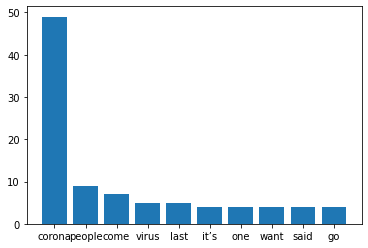

In [11]:
# Import packages
import matplotlib.pyplot as plt
# Most common words
word_counts = collections.Counter(all_words)
mc = word_counts.most_common(10)
x=  [i[0] for i in mc]
y = [i[1] for i in mc]
print(y)
fig, ax = plt.subplots()
plt.bar(x,y)
fig.savefig('my_plot.png')

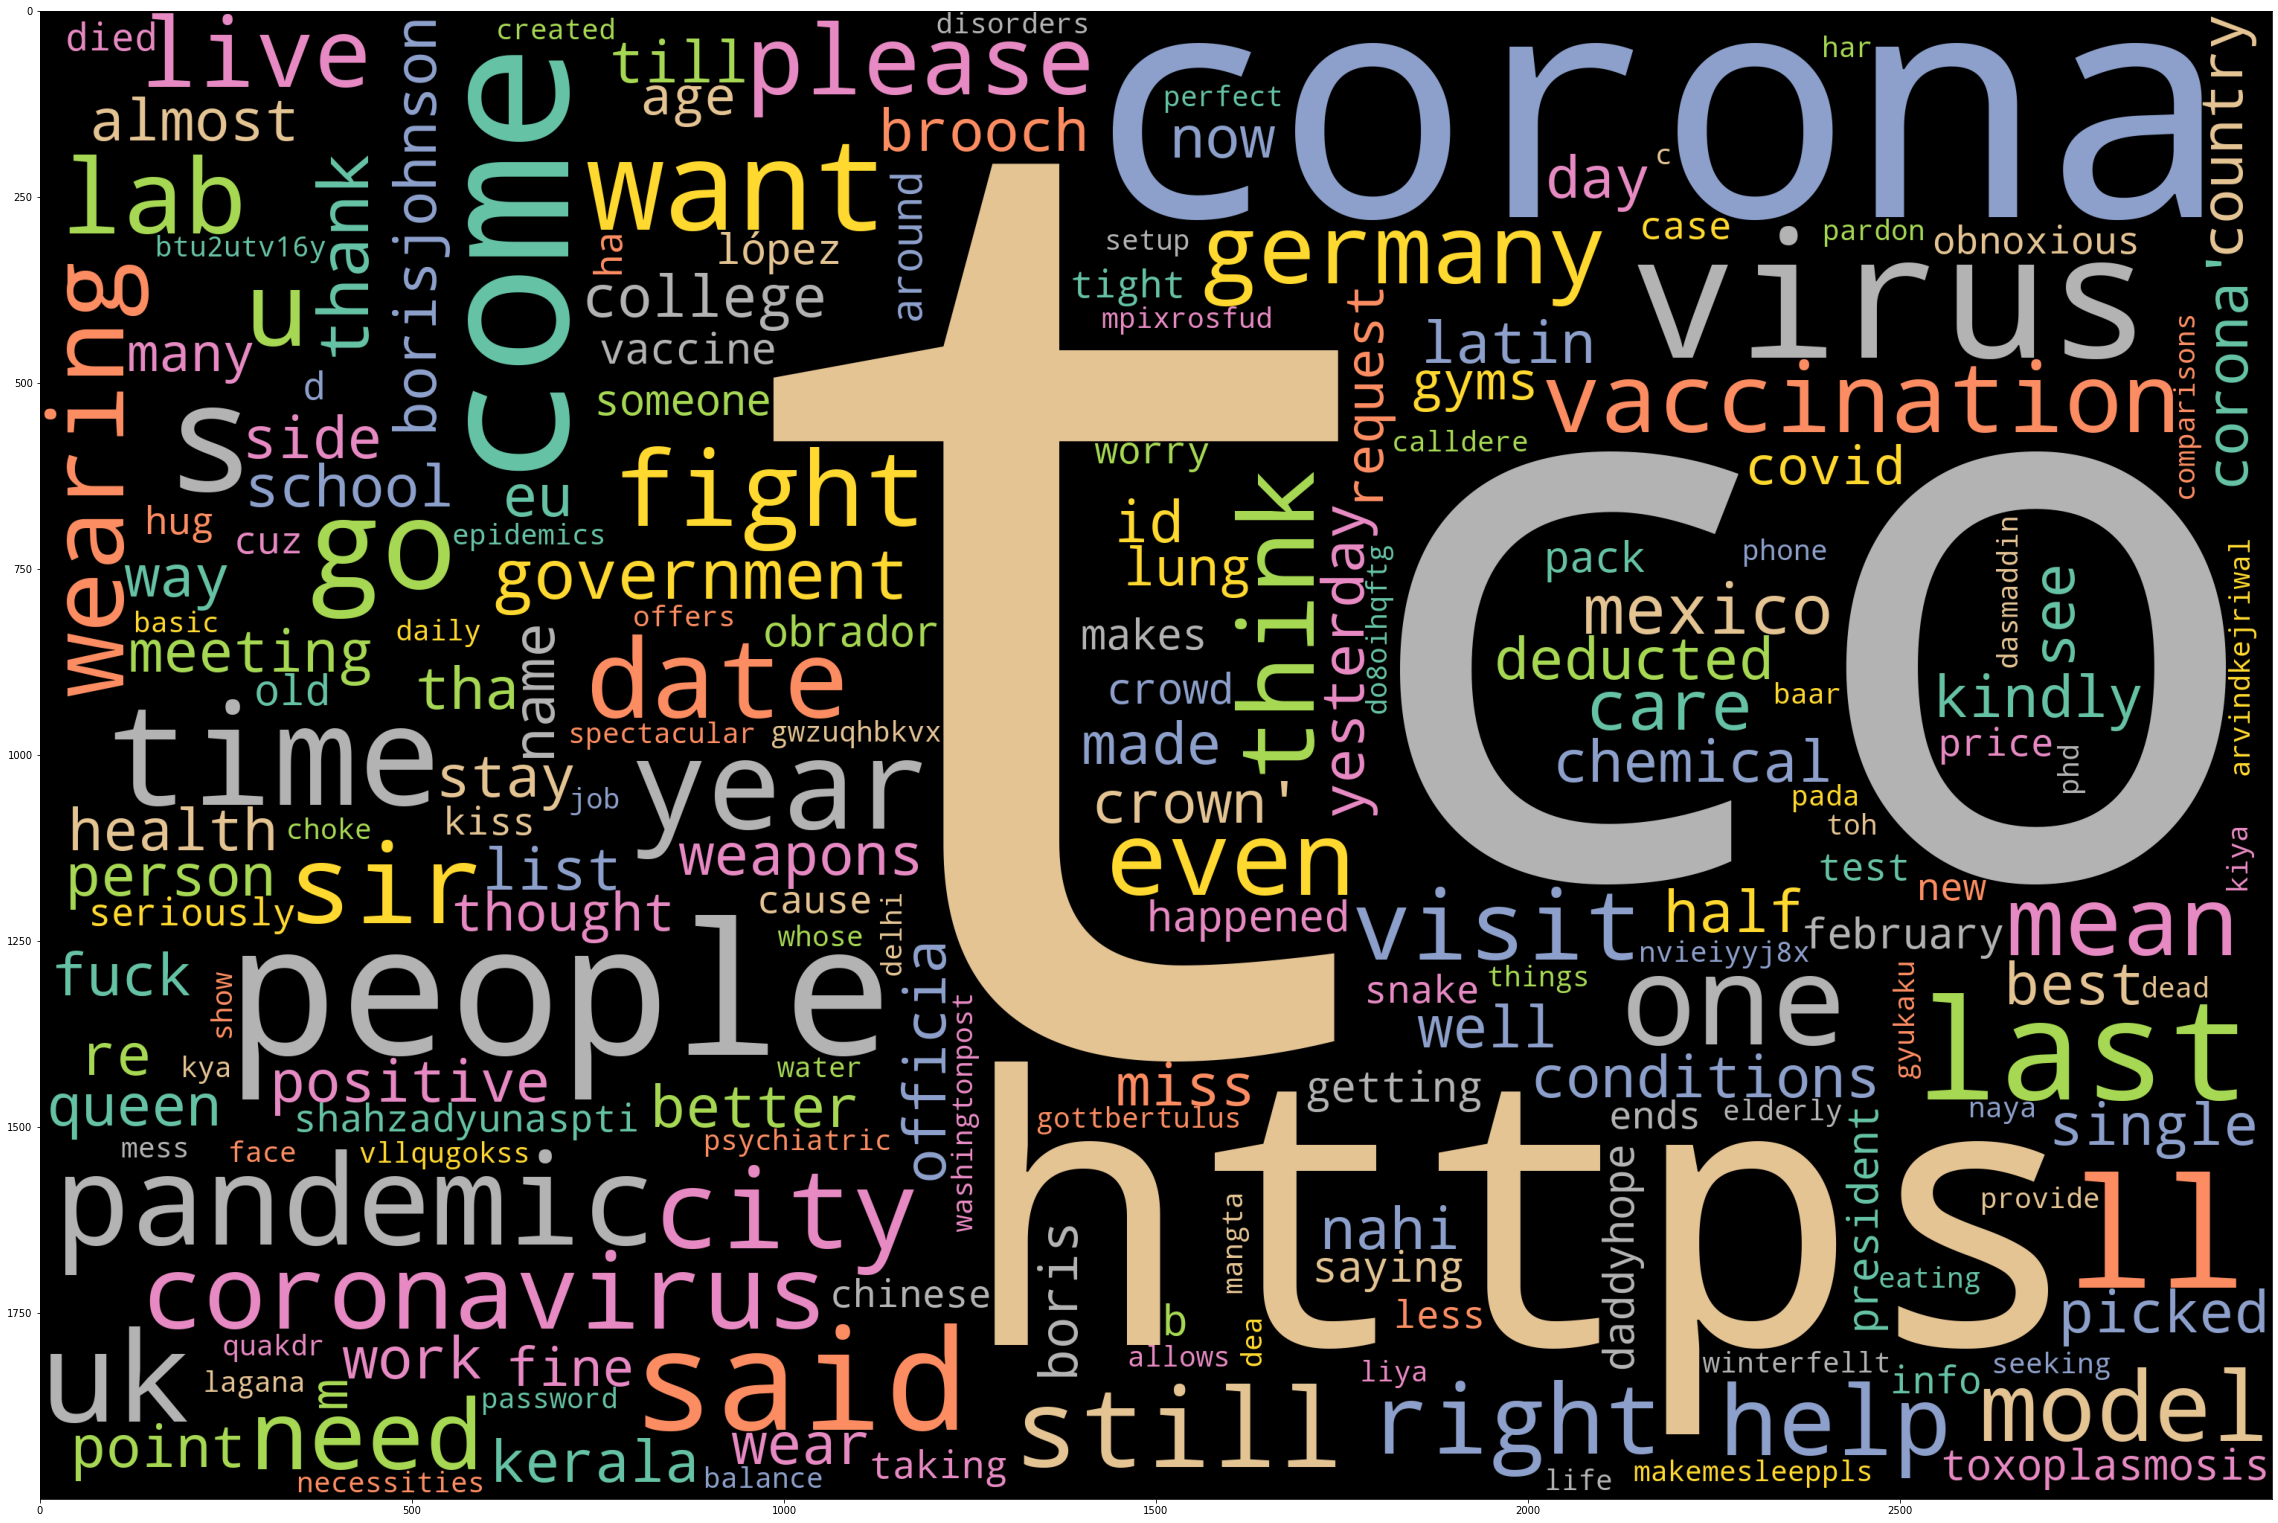

In [12]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
text = " ".join(all_words)

# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Set figure size
plt.figure(figsize=(40, 30))
#Display image
plt.imshow(wordcloud)


In [13]:
x = (pd.Series(nltk.ngrams(all_words, 2)).value_counts())[:10]
x.keys()

Index([    ('corona', 'virus'),      ('you’ll', 'come'),
            ('corona', 'ends'), (''corona'', 'brooch.'),
              ('visits', 'uk'),      ('uk', 'chemical'),
               ('i’d', 'kiss'), ('chemical', 'weapons'),
           ('queen', 'visits'),       ('means', ''the')],
      dtype='object')

In [22]:
zipped = x.keys()
unzipped_object = zip(*zipped)
unzipped_list = list(unzipped_object) 
a, b = unzipped_list
nodes = list(a) +list(b)
edges = x.index.to_list()

[('corona', 'virus'),
 ('you’ll', 'come'),
 ('corona', 'ends'),
 ("'corona'", 'brooch.'),
 ('visits', 'uk'),
 ('uk', 'chemical'),
 ('i’d', 'kiss'),
 ('chemical', 'weapons'),
 ('queen', 'visits'),
 ('means', "'the")]

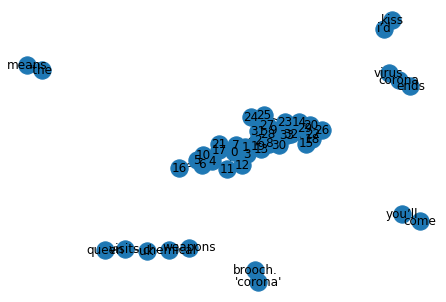

<Figure size 432x288 with 0 Axes>

In [25]:
import networkx as nx
import matplotlib.pyplot as plt     #paketi import ediyoruz
G = nx.karate_club_graph()             
G.add_nodes_from(c)                   
G.add_edges_from(b)     
nx.draw(G, with_labels=True)

# Set figure size
plt.figure()
plt.show()

In [16]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
